## Introduction to Linear Regression

Linear regression is a fundamental machine learning algorithm used to predict continuous numerical values. It belongs to the category of supervised machine learning algorithms, as it learns from labeled data (data with known outputs) during training.

In regression analysis, we have independent and dependent variables. The independent variable(s) are used to predict the dependent variable.

For example, in predicting house prices, the size of the house (independent variable) might be used to predict its price (dependent variable). Similarly, in predicting a person's salary, factors like years of experience and education level (independent variables) can be used to estimate their salary (dependent variable).

### Types of Linear Regression

There are two main types of linear regression:

1. Simple Linear Regression
2. Multiple Linear Regression

__Simple Linear Regression__: In simple linear regression, there is only one independent variable, which is used to predict the dependent variable. For example, predicting a person's height based on their age is a case of simple linear regression, where age is the independent variable and height is the dependent variable.

__Multiple Linear Regression__: In multiple linear regression, two or more independent variables are used to predict the dependent variable. For instance, predicting a house's price based on factors like size, location, and number of bedrooms is an example of multiple linear regression. Here, size, location, and number of bedrooms are the independent variables, and the house price is the dependent variable.

### Methods to Build a Linear Regression Model

Ordinary Least Squares (OLS) and Gradient Descent are two common methods used to build linear regression models. While both aim to minimize the error between predicted and actual values, they approach the problem differently.

1. __Ordinary Least Squares (OLS)__:

OLS is a statistical method used to estimate the parameters (slope and intercept) of the linear regression model. It does this by minimizing the sum of the squared differences between the observed and predicted values.

2. __Gradient Descent__:

Gradient Descent is an optimization algorithm used to minimize the cost function of a model. It iteratively adjusts the model parameters by taking steps proportional to the negative of the gradient of the cost function.

In this notebook, we will focus on building a linear regression model using the OLS method and compare it to a model built using the `sklearn` library.

## Mathematical Foundation

The equation $Y = b + mX$ is the formula for a straight line in slope-intercept form. Here's what each term represents:

- `Y` is the dependent variable (the value you're solving for).
- `X` is the independent variable (the value you input).
- `m` is the slope of the line, which represents the rate of change of `Y` with respect to `X`.
- `b` is the y-intercept, which is the point where the line crosses the y-axis (when `X = 0`).

This form of the equation is commonly used in algebra and statistics to describe linear relationships between variables.

This equation is for simple linear regression, here we only have one independent variable `(X)`. But as the number of independent variable increase, we will have as many `(X)` possible. In that case equation will look like:

$ Y = m_1X_1 + m_2X_2 + m_3X_3 + .... + m_nX_n $






### Calculation of slope (m) and intercept (b)

There is two ways to calculate the slope and intercept one is `OLS` method and other `Gradient descent`

In OLS, we use formulas to calculate the value of m and b. And then using this equation $\hat{Y} = mX + b$  to draw a best fit line

Apart from that we have calculate the resudual, which is equal to

$Resudual =Y - \hat{Y}$

Resudual is nothing but the difference between predicted and actaul value.
And by using this Resudaul we calculate the loss or error, we call this method a mean square error

$E = \sum (Y - \hat{Y})^2$

Formulas to calculate the value of $b$ and $m$

$b = \bar{Y} - m*\bar{X}$

$
m = \frac{\sum{(X - \overline{X})(Y - \overline{Y})}}{\sum{(X - \overline{X})^2}}
$


#### Mathematical Intution Of Simple Linear Regression using OLS

Now we will try to understand how we have arrived to $intercept : b$ and $slope : m$ formula throug mathematical concept of $pre-calculus$. We will also try to bult our own Linear Regression model and will apply it to __sklearn load_diabetes__ dataset.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes

# Load the diabetes dataset
diabetes = load_diabetes()

# Convert to a pandas DataFrame for easier manipulation
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)

# Add the target variable (Y) to the DataFrame
df['target'] = diabetes.target

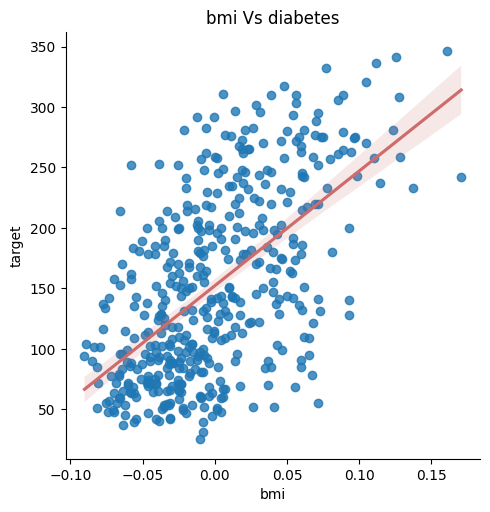

In [4]:
diabetes_slr = df[['bmi', 'target']]
sns.lmplot(data=diabetes_slr, x='bmi', y='target',line_kws={'color': '#CE6B6B'})
plt.title('bmi Vs diabetes')
plt.show();

The scatter plot above shows the relationship between `bmi` and diabetes. The target variable (diabetes) is on the $Y$ axis, while `bmi` is on the $X$ axis.

Here, diabetes is the dependent variable, and `bmi` is the independent variable.

Additionally, the pink line represents the best fit line, with the equation $Y = mX + b$, where $X$ is given, and our objective is to find $m$ and $b$.

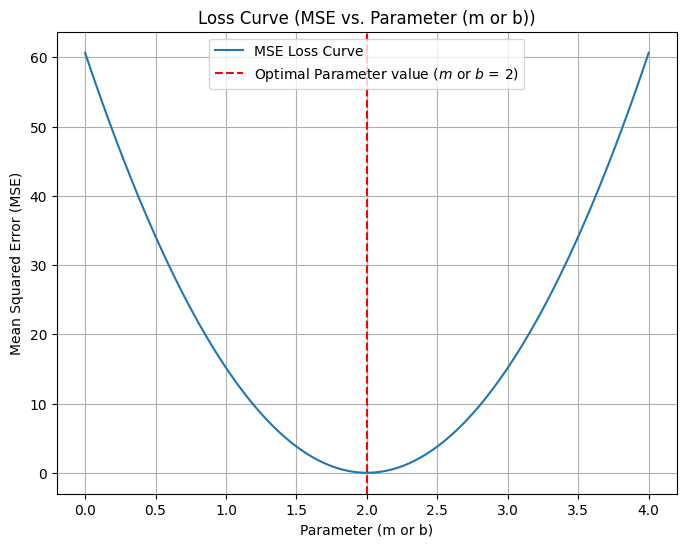

In [5]:
from sklearn.metrics import mean_squared_error

# Sample data (X and Y)
X = np.array([1, 2, 3, 4, 5, 6])
Y = np.array([2, 4, 6, 8, 10, 12])

# Fixed intercept (b)
b = 0

# Generate a range of slope (m) values
m_values = np.linspace(0, 4, 100)

# Calculate the loss (MSE) for each m
loss_values = []
for m in m_values:
    Y_pred = m * X + b
    loss = mean_squared_error(Y, Y_pred)
    loss_values.append(loss)

# Plotting the loss curve
plt.figure(figsize=(8, 6))
plt.plot(m_values, loss_values, label='MSE Loss Curve')
plt.xlabel('Parameter (m or b)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Loss Curve (MSE vs. Parameter (m or b))')
plt.axvline(x=2, color='r', linestyle='--', label='Optimal Parameter value ($m$ or $b$ = 2)')
plt.legend()
plt.grid(True)
plt.show()


This above graphs shows the relation between parameters and loss function (MSE). The m & b are the parameters we used to draw the best fit line. And this graph showing how loss impacted by the change in parameters. Our objective is to draw the best fit line, and to draw the best fit line we should get that value of m & b where the loss is minimum or close to zero.

Graph of loss function looklike a funnel, and we need to reach the bottom. How we can do it?

If we look closely, the point where the loss is minimul, the slope of the curve at that point is zero.

So, we need to find that point of $m$ and $b$ where the slope of the loss curve is close to or equal to zero. We can get this by doing the differenciation of $m , b$ with respect to loss function $f(m,b)$. And after getting the derivative we can compare it with equal to zero

#### Mathematical Formulation to calculate slope $m$ and intercept $b$

We will use loss function to see how we reach to formula for both $m$ & $b$. We will use pre-calculus to get the derivative of loss function with respect to both $m$ and $b$.

After that we will compare them with zero, to get the exect formula.


Formula :

$f(m,b) = \sum(Y - mX - b)^2$

##### Differentiate the loss function $f(m,b)$ with respect to $b$

Will get the value by differentiating, loss function $f(m,b)$ with respect to $b$

To find the derivative of the function with respect to $b$

$$
\frac{d}{db}f(m,b) = \sum_{i=1}^{n} \frac{d}{db}\left( Y_i - mX_i - b \right)^2
$$

with respect to $( b )$, we use the chain rule.

1. **Differentiate the Squared Term:**

   $$
   \frac{d}{db} \left( Y_i - mX_i - b \right)^2
   $$

   Applying the chain rule:

   $$
   \frac{d}{db} \left( Y_i - mX_i - b \right)^2 = 2 \left( Y_i - mX_i - b \right) \cdot \frac{d}{db} \left( Y_i - mX_i - b \right)
   $$

   The derivative of $ (Y_i - mX_i - b) $ with respect to \( b \) is \( -1 \). Therefore:

   $$
   \frac{d}{db} \left( Y_i - mX_i - b \right)^2 = -2 \left( Y_i - mX_i - b \right)
   $$

2. **Sum Over All Data Points:**

   $$
   \frac{d}{db} f(m,b) = \sum_{i=1}^{n} \frac{d}{db} \left( Y_i - mX_i - b \right)^2
   $$

   Substituting the derivative we computed:

   $$
   \frac{d}{db} f(m,b) = \sum_{i=1}^{n} -2 \left( Y_i - mX_i - b \right)
   $$

3. **Final Expression:**

   $$
   \frac{d}{db} f(m,b) = -2 \sum_{i=1}^{n} \left( Y_i - mX_i - b \right)
   $$

This derivative is used in optimization to update the parameter $( b )$ and minimize the loss function.


To find the value of $( b )$ where the derivative of $f(m,b) $ with respect to $( b )$ equals zero, follow these steps:

1. **Set the Derivative to Zero**:

   We have the derivative:

   $$
   \frac{d}{db} f(m,b) = -2 \sum_{i=1}^{n} \left( Y_i - mX_i - b \right)
   $$

   Set this derivative equal to zero:

   $$
   -2 \sum_{i=1}^{n} \left( Y_i - mX_i - b \right) = 0
   $$

2. **Simplify the Equation**:

   Divide both sides by $(-2)$:

   $$
   \sum_{i=1}^{n} \left( Y_i - mX_i - b \right) = 0
   $$

   Distribute the summation:

   $$
   \sum_{i=1}^{n} Y_i - \sum_{i=1}^{n} mX_i - \sum_{i=1}^{n} b = 0
   $$

   Since $( b )$ is constant, it can be factored out of the summation:

   $$
   \sum_{i=1}^{n} Y_i - m \sum_{i=1}^{n} X_i - n \cdot b = 0
   $$

3. **Solve for $( b )$**:

   Isolate $( b )$:

   $$
   n \cdot b = \sum_{i=1}^{n} Y_i - m \sum_{i=1}^{n} X_i
   $$

   Therefore:

   $$
   b = \frac{1}{n} \left( \sum_{i=1}^{n} Y_i - m \sum_{i=1}^{n} X_i \right)
   $$

   Recognize that:

   - $ \overline{Y} $ is the mean of \( Y \), i.e., $ \overline{Y} = \frac{1}{n} \sum_{i=1}^{n} Y_i $
   - $\overline{X}$ is the mean of \( X \), i.e., $\overline{X} = \frac{1}{n} \sum_{i=1}^{n} X_i $

   Substitute these into the equation:

   $$
   b = \overline{Y} - m \cdot \overline{X}
   $$

__Final Output__

The value of $( b )$ that minimizes the loss function is:

$$
b = \overline{Y} - m \cdot \overline{X}
$$


##### Differentiate the loss function $f(m,b)$ with respect to $m$

To differentiate the function

$$
\frac{d}{dm} \left( Y_i - mX_i - b \right)^2
$$

with respect to $( m )$, follow these steps:

1. **Define the Function**:

   Consider the function to differentiate:

   $$
   \frac{d}{dm}f(m,b) = \sum \frac{d}{dm}\left( Y_i - mX_i - b \right)^2
   $$

2. **Apply the Chain Rule**:

   To differentiate $f(m,b)$ with respect to $( m )$, apply the chain rule. First, let $( u = Y_i - mX_i - b )$. Then:

   $$
   f(m) = u^2
   $$

   The derivative of $( u^2 )$ with respect to $( u )$ is $( 2u )$. Now, differentiate $( u )$ with respect to $( m )$:

   Combine these using the chain rule:

   $$
   \frac{d}{dm} \left( Y_i - mX_i - b \right)^2 = 2 \left( Y_i - mX_i - b \right) \cdot \frac{d}{dm} \left( Y_i - mX_i - b \right)
   $$

   Substituting : Here $b = \overline{Y} - m \cdot \overline{X} $
   
   $$\frac{d}{dm} \left( Y_i - mX_i - (\overline{Y} - m \cdot \overline{X}) \right) = (-X_i + \overline{X}) $$

   $$
   \frac{d}{dm} \left( Y_i - mX_i - b \right)^2 = 2 \left( Y_i - mX_i - b \right) \cdot (-X_i + \overline{X})
   $$

   Final Output:


   $$
   \frac{d}{dm} f(m) = 2 \sum \left( Y_i - mX_i - b \right) \cdot (-X_i + \overline{X})
   $$



Now We can find $\frac{d}{dm} f(m,b) = 0$:

substituting $\frac{d}{dm} f(m,b)$ with:
$
2 \sum \left( Y_i - mX_i - b \right) \cdot (-X_i + \overline{X})
$

So, new expression will be

$
2 \sum (Y_i - m\cdot X_i - b)\cdot (-X_i + \overline{X}) = 0
$

substitue  : $ b = \overline{Y} - m \cdot \overline{X} $

$
2 \sum (Y_i - m\cdot X_i - (\overline{Y} - m \cdot \overline{X}) )\cdot (-X_i + \overline{X}) = 0
$

$
2 \sum (Y_i - m\cdot X_i - \overline{Y} + m \cdot \overline{X})\cdot (-X_i + \overline{X}) = 0
$

$
2 \sum [[(Y_i - \overline{Y}) - m\cdot (X_i - \overline{X})]\cdot (-X_i + \overline{X})]] = 0
$

__Taking -1 common from__ $(-X_i + \overline{X})$ :

$
-2 \sum [[(Y_i - \overline{Y}) - m\cdot (X_i - \overline{X})]\cdot (X_i - \overline{X})]] = 0
$

__Now we will open the bracket and will multiply $(X_i - \overline{X})$ inside the bracket__

__Transfer the -2 to the other side, in result the new equation will be__

$
\sum [(Y_i - \overline{Y}) \cdot (X_i - \overline{X}) - m \cdot (X_i - \overline{X}) \cdot (X_i - \overline{X})] = 0
$

Open the $\sum$ to the function :

$
\sum [(Y_i - \overline{Y}) \cdot (X_i - \overline{X})] - m \cdot \sum[(X_i - \overline{X}) \cdot (X_i - \overline{X})] = 0
$

$
\sum [(Y_i - \overline{Y}) \cdot (X_i - \overline{X})] = m \cdot \sum[(X_i - \overline{X}) \cdot (X_i - \overline{X})]
$

$
m = \frac {\sum [(Y_i - \overline{Y}) \cdot (X_i - \overline{X})]} {\sum[(X_i - \overline{X}) \cdot (X_i - \overline{X})]}
$

__Final Output__

$
m = \frac {\sum (Y_i - \overline{Y}) \cdot (X_i - \overline{X})} {\sum(X_i - \overline{X})^2}
$

## Built $Simple Linear Regression$ from Skretch

In [37]:
class ourlr:
  def __init__(self,m=None,b=None):
    self.m = None
    self.b = None

  def fit(self,X_train,Y_train):
    slope_num = np.sum((Y_train - Y_train.mean()) * (X_train - X_train.mean()))
    slope_den = np.sum((X_train - X_train.mean())**2)
    self.m = slope_num/slope_den
    self.b = Y_train.mean() - self.m * X_train.mean()

  def predict(self,X_test):
    return self.m * X_test + self.b

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Setting X and Y variable
X = diabetes_slr['bmi']
Y = diabetes_slr['target']

# Train test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

####__Using Our Base Model__

In [39]:
Lr = ourlr()
Lr.fit(X_train,Y_train)
Lr_prediction = Lr.predict(X_test)
Lr.b, Lr.m

(152.00335421448167, 998.5776891375597)

####__Using Our Sklearn Model__

In [40]:
Lr2 = LinearRegression()
X_train_r = X_train.values.reshape(-1,1)
X_test_r = X_test.values.reshape(-1,1)
Lr2.fit(X_train_r,Y_train)
Lr2_prediction = Lr2.predict(X_test_r)
Lr2.intercept_, Lr2.coef_[0]

(152.00335421448167, 998.5776891375598)

#### Comparision : Base Model Vs SkLearn Model

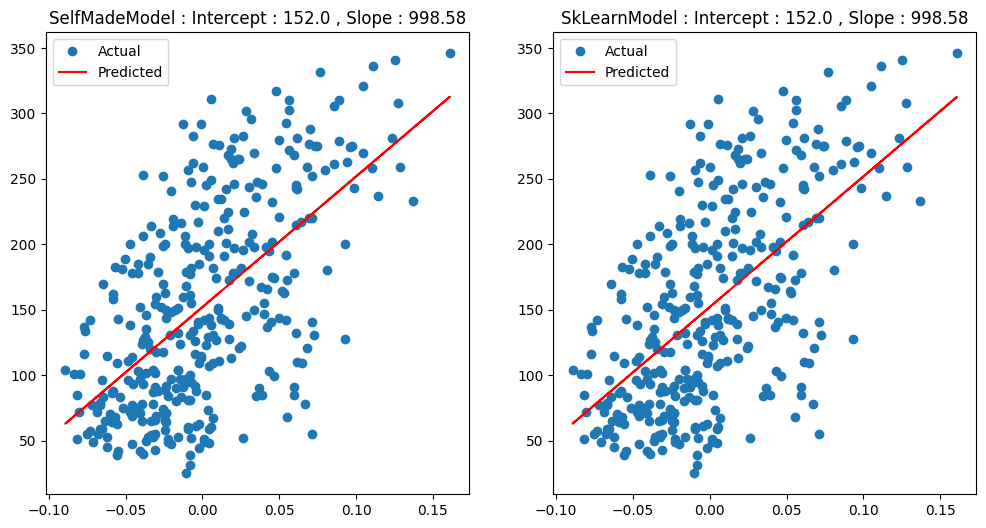

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))  # Adjusted figure size for better spacing

# First subplot
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.plot(X_train, Y_train, 'o', label='Actual')
plt.plot(X_train, Lr.predict(X_train), 'r', label='Predicted')
plt.title(f'SelfMadeModel : Intercept : {round(Lr.b,2)} , Slope : {round(Lr.m,2)}')
plt.legend()

# Second subplot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.plot(X_train, Y_train, 'o', label='Actual')
plt.plot(X_train, Lr2.predict(X_train_r), 'r', label='Predicted')
plt.title(f'SkLearnModel : Intercept : {np.round(Lr2.intercept_,2)} , Slope : {np.round(Lr2.coef_[0],2)}')
plt.legend()

plt.show()


The scatter plots above showcase the performance of two different linear regression models applied to the same dataset.

1. __Left Plot__: This plot represents the predictions from a self-made linear regression model. The model's parameters (intercept and slope) were computed manually, and the predicted values are plotted against the actual data points.

2. __Right Plot__: This plot illustrates the predictions generated by the sklearn linear regression model. The sklearn model automatically computes the best-fit line using the least squares method, and its intercept and slope are displayed.

Conclusion

* Both models produce very similar results, with nearly identical intercept and slope values. This demonstrates that the self-made model effectively mimics the behavior of the sklearn model.

* The similarity in the predicted lines indicates that the manual computation of model parameters is accurate and consistent with the industry-standard approach provided by sklearn.